In [69]:
#These are the libraries you can use.  You may add any libraries directy related to threading if this is a direction
#you wish to go (this is not from the course, so it's entirely on you if you wish to use threading).  Any
#further libraries you wish to use you must email me, james@uwaterloo.ca, for permission.

from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt
import random
from datetime import datetime

## Group Assignment
### Team Number: 17
### Team Member Names: Jack, Jennifer, Justus, Precious
### Team Strategy Chosen: Market Meet (Market Beat or Market Meet)

Disclose any use of AI for this assignment below (detail where and how you used it).  Please see the course outline for acceptable uses of AI.

We use AI to: <br>
Code Debugging: Identifying and resolving issues in functions such as calculate_shares, calculate_value, and build_portfolio. <br>
Code Optimization: Rewriting existing code for better readability and performance while ensuring adherence to assignment requirements. <br>
CSV Export Functionality: Providing code to export specific DataFrames to CSV files as required.

## Introduction
When finding an objective weighting system for our sorting and selection to operate with, we found it beneficial to draw upon more than just the returns of the stock but instead a combination of the returns, the stock’s market capitalization and the tracking error found from comparing the individual stock to the market. Although it may seem intuitive to just select the stocks that provide the closest average return to the market for our portfolio, the inclusion of the other three metrics in our rating index helps us to assess more than just the returns of each stock, but their overall place in the market.

In [73]:
## Read in portfolio of tickers and create a dataframe
start_date_required = '2023-10-01'
end_date_required = '2024-09-30'
count_days = 0
monthly_vol = []

# This function counts the monthly volume of the stock and finds the average monthly volume
def count_volume(ticker):
    ticker_hist = ticker.history(start=start_date_required, end=end_date_required)
    ticker_hist.index = ticker_hist.index.strftime('%Y-%m-%d')
    # Oct 2023
    filtered_df = ticker_hist.loc[(ticker_hist.index >= '2023-10-01')
                         & (ticker_hist.index < '2023-11-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # Nov 2023
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2023-11-01')
                             & (ticker_hist.index < '2023-12-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # Dec 2023
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2023-12-01')
                         & (ticker_hist.index < '2024-01-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # jan 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-01-01')
                             & (ticker_hist.index < '2024-02-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # Feb 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-02-01')
                             & (ticker_hist.index < '2024-03-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # March 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-03-01')
                             & (ticker_hist.index < '2024-04-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # April 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-04-01')
                             & (ticker_hist.index < '2024-05-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # May 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-05-01')
                             & (ticker_hist.index < '2024-06-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
    
        # June 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-06-01')
                             & (ticker_hist.index < '2024-07-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # July 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-07-01')
                             & (ticker_hist.index < '2024-08-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # Aug 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-08-01')
                             & (ticker_hist.index < '2024-09-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
         
        # Sept 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-09-01')
                             & (ticker_hist.index < '2024-10-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))

    return np.mean(monthly_vol)


In [74]:
## function that takes in a dataframe of stock tickers removes unlisted, low volume or stocks not denominated in USD or CAD
def remove_unwanted(df):
    drop_rows = []
    for i in range(len(df) - 1):
        try:
            ticker = yf.Ticker(df.iloc[i,0])
            currency = ticker.info.get('currency')
            if currency not in ['USD', 'CAD']:
                drop_rows.append(i)
                continue
            if (count_volume(ticker) < 100000):
                drop_rows.append(i)
                continue
        except: 
            drop_rows.append(i)
            continue
    df.drop(drop_rows, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [75]:
# Retrieving tickers from csv file
tickers = pd.read_csv('Tickers.csv', header=None)
tickers = tickers.rename(columns={0: 'Ticker'})

df = remove_unwanted(tickers)
df

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ASDFAASDF.TO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ASDFAASDF.TO&crumb=nmNSvZVFWDk
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/INVALIDTIC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=INVALIDTIC&crumb=nmNSvZVFWDk


,Ticker
0,AAPL
1,ABBV
2,LOW
3,AUST
4,HOOD
5,AMZN
6,AXP
7,BAC
8,BK
9,SQ


## Choosing our Time Frame For S&P500 and TSX60
We decided to create our portfolio with a three year time period, from 2021-01-01 to 2024-11-02. Choosing a three year period allows us to mitigate short term market volatility that could distort the relationship between the portfolio and the S&P500 and TSX60 indices. For instance, a shorter time period such as one year may include anomalies from recent trends in the market that do not accurately reflect the portfolio long term. This is especially important when calculating volatility as it can be inflated by short-term price swings. Furthermore, a three year time period is long enough to capture different market cycles to provide a more accurate representation of how the portfolio will perform under different market conditions. This ensures the portfolio is not biased towards a single market trend, allowing us to better evaluate its consistency. 

In [77]:
# Retrieving data from S&P500 
start_date = '2021-01-01'
end_date = '2024-11-02'

sp500_ticker = yf.Ticker('^GSPC')
sp500 = sp500_ticker.history(start=start_date, end=end_date, interval='1mo')[['Close']]
sp500.index = sp500.index.strftime('%Y-%m-%d')
sp500_returns = sp500.ffill().pct_change().dropna()
sp500_returns.rename(columns={'Close': 'S&P500 Returns'}, inplace=True)

In [78]:
# Getting tsx historical data
tsx_ticker = yf.Ticker('XIU.TO')
tsx = tsx_ticker.history(start=start_date,end=end_date, interval='1mo')[['Close']]
tsx.index = tsx.index.strftime('%Y-%m-%d')
tsx_returns = tsx.ffill().pct_change().dropna()
tsx_returns.rename(columns={'Close': 'TSX60 Returns'}, inplace=True)

In [79]:
# The percentage change should be (end_price - start_price) / start_price
sp500_start_price = sp500.iloc[0]['Close']
sp500_end_price = sp500.iloc[-1]['Close']
sp500_pct_change = (sp500_end_price - sp500_start_price) / sp500_start_price

tsx_start_price = tsx.iloc[0]['Close']
tsx_end_price = tsx.iloc[-1]['Close']
tsx_pct_change = (tsx_end_price - tsx_start_price) / tsx_start_price

avg_pct_change = (sp500_pct_change + tsx_pct_change) / 2

In [80]:
# combining dataframe to get total pct change 
sp500tsx60 = sp500_returns.join(tsx_returns)
sp500tsx60['Total % Change'] = sp500tsx60.mean(axis=1)
sp500tsx60.head()

,S&P500 Returns,TSX60 Returns,Total % Change
Date,,,
2021-02-01,0.026091,0.036510,0.031301
2021-03-01,0.042439,0.052981,0.047710
2021-04-01,0.052425,0.023050,0.037737
2021-05-01,0.005486,0.030849,0.018168
2021-06-01,0.022214,0.033423,0.027818


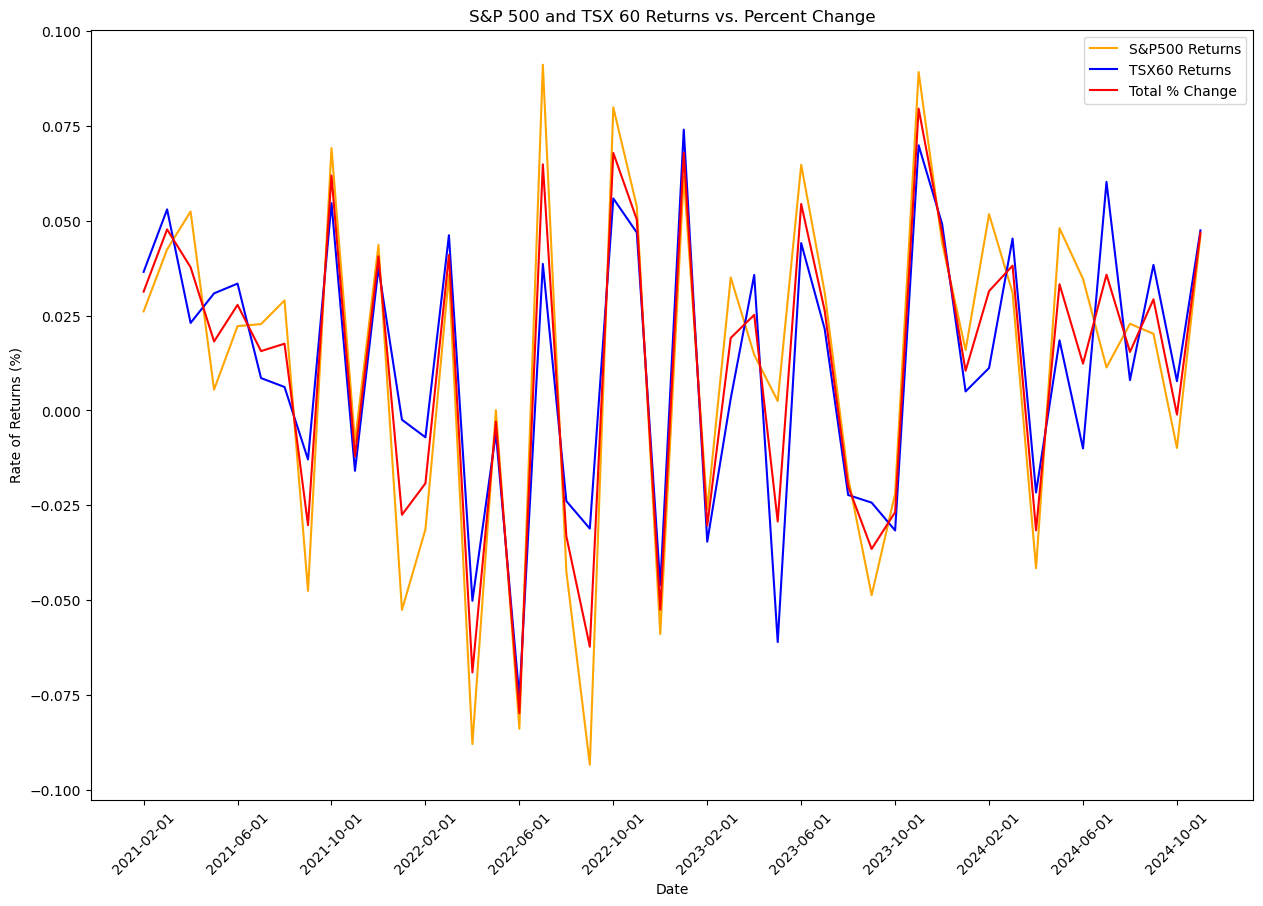

In [81]:
# Plotting the S&P 500 and TSX 60 Returns alongside the percent change
plt.figure(figsize=(15,10))

plt.plot(sp500tsx60["S&P500 Returns"], color = 'orange',  label="S&P500 Returns")
plt.plot(sp500tsx60["TSX60 Returns"], color = 'blue',  label="TSX60 Returns")
plt.plot(sp500tsx60["Total % Change"], color = 'red',  label="Total % Change")
plt.xticks( ["2021-02-01", "2021-06-01", "2021-10-01", "2022-02-01", "2022-06-01", "2022-10-01", 
             "2023-02-01", "2023-06-01", "2023-10-01", "2024-02-01", "2024-06-01", "2024-10-01"], rotation = 45)

plt.title('S&P 500 and TSX 60 Returns vs. Percent Change')
plt.ylabel('Rate of Returns (%)')
plt.xlabel('Date')
plt.legend(loc='best')

The graph above analyzes the Rate of Return for the S&P 500 and the TSX and thier total percent change. Using these metrics we can see the general trend that is being followed by both indexes, with either rising and falling by about the same amount as the other, made even more clear by the overlapping lines. Considering historical rates of return can tell us about how profitable an investment was in the past and can lead use to infer about the future. In our cause, looking at this data gives us a pathway that we would like our own ideal portfolio to follow. If our portfolio can also match the pace of the trend lines above, and hence match around the same rate of return historically, then it is more likely to meet the market index as it's rate or returns will also follow the S&P and TSX 60 as closesly as possible.

In [83]:
# Calculate the standard deviation of both indices
sp500_std = sp500tsx60["S&P500 Returns"].std()
tsx60_std = sp500tsx60["TSX60 Returns"].std()

print("The standard deviation of the TSX60 over the period of data is:", np.round(tsx60_std, 5))
print("The standard deviation of the S&P 500 over the period of data is:", np.round(sp500_std, 5))

The standard deviation of the TSX60 over the period of data is: 0.03667
The standard deviation of the S&P 500 over the period of data is: 0.04669


## Determining Our Ideal Stocks In Our Portfolio

### Market Capitalization
First, we decided upon including market capitalization in our stock picking method because of how the S&P 500 and the TSX 60 are created and maintained. In both of these indexes, a larger cap stock is given more weight in the index than a smaller cap stock, as the goal of these indexes is to provide a sample that represents the entire market. What this means for us is if we pick a higher market capitalization stock, it is more likely to influence the market indexes we are comparing our portfolio to.  

### Difference of Returns
The second factor we included in our stock-picking methodology is the returns difference. This factor measures how closely the returns of an individual stock align with the average market returns. The logic behind incorporating this metric is rooted in the principle of consistency and reliability. Stocks with returns significantly higher or lower than the market average introduce variability and uncertainty, which may not align with the goals of a stable, benchmark-aligned portfolio. By emphasizing returns that are close to the market benchmark, we can ensure that the portfolio performs in line with the index over time.

### Tracking Error
The third special metric we are using to determine our portfolio is tracking error. Tracking error is defined as

Tracking Error = Standard Deviation of (P - B)

Where P is the percent return of a portfolio or individual stock and B is the benchmark or market return. This metric proves very useful in determining the risk of a stock relative to the market, as a stock that moves consistently with the market will often have a very low tracking error. We decided to include this metric in our portfolio development because, in the case of a long term portfolio, we want to mitigate risk, not invite it. For example, if a stock were to have adequate returns for our portfolio but a very high tracking error compared to the market, the stock is risky and may lead to uncertainty in a long term portfolio. 

In [85]:
# Weight on the factors according to several testings
market_value_weight = 1
returns_weight = 0.001
tracking_error_weight = 0.1

# Retrieve data from yahoo finance
market_returns = sp500tsx60['Total % Change'].mean()
total_market_value = 50578000000000 # The total market cap of S&P 500 and TSX 60

# rating gives every stock a rating and sorts them in non-increasing order
# Three factors to be considered:
    # 1. Market Capitalization
    # 2. Difference of Returns
    # 3. Tracking Error 
# A higher rating means the stock aligns better with the true market index.
def rating(dataframe):
    for stock, row in dataframe.iterrows():
        # Get the closing prices of the stock 
        stock_tick = yf.Ticker(row["Ticker"])
        stock_data = stock_tick.history(start=start_date, end=end_date, interval='1mo')[['Close']]
        # calculate returns for stock
        stock_returns_df = stock_data.ffill().pct_change().dropna()
        
        # Step 1: Calculate Market Value Score
        stock_market_value = stock_tick.fast_info['marketCap']
        if stock_market_value is None:
            market_value_score = 0  # Assign a default score (e.g., 0) if marketCap is missing
        else:
            market_value_score = stock_market_value / total_market_value
        dataframe.at[stock, "Market value score"] = market_value_score

        # Step 2: Calculate Returns Score
        stock_returns = stock_returns_df['Close'].mean() 
        returns_score = abs(stock_returns - market_returns)
        dataframe.at[stock, "Returns score"] = 1 / returns_score

        # Step 3: Calculate tracking error score 
        tracking_error = (stock_returns_df['Close'] - market_returns).std()
        dataframe.at[stock, "Tracking error score"] = 1 / tracking_error
        
        # Step 4: Calculate rating of the stock based on weight
        dataframe["Rating"] = dataframe["Market value score"] * market_value_weight + dataframe["Returns score"] * returns_weight + dataframe["Tracking error score"] * tracking_error_weight 
                              

    # Sort the rating in descending order
    sorted_df = dataframe.sort_values(by='Rating', ascending=False)
    return sorted_df

df_ratings = rating(df)
df_ratings

AW.TO: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']


,Ticker,Market value score,Returns score,Tracking error score,Rating
30,GC=F,0.000000e+00,789.463200,23.562067,3.145670
14,CSCO,4.610514e-03,1478.694646,14.762298,2.959535
23,PEP,4.394448e-03,220.130198,22.690272,2.493552
26,SO,1.897694e-03,495.655933,17.185419,2.216096
32,RY.TO,4.885925e-03,218.705793,19.677183,2.191310
33,TD.TO,2.742107e-03,214.305631,19.483342,2.165382
31,T.TO,6.271486e-04,94.805397,18.884677,1.983900
24,T.TO,6.271486e-04,94.805397,18.884677,1.983900
10,VZ,3.591394e-03,99.637427,17.463495,1.849578
2,LOW,2.956704e-03,385.093640,13.952101,1.783260


In [86]:
# This function chooses 'numStocks' of stocks from the top of the dataframe
def select_stocks(numStocks, df):
    chosen_stocks = df.iloc[:numStocks, :].copy()
    return chosen_stocks[['Ticker', 'Rating']]

chosen_stocks = []
chosen_stocks = select_stocks(24, df_ratings)
chosen_stocks

,Ticker,Rating
30,GC=F,3.145670
14,CSCO,2.959535
23,PEP,2.493552
26,SO,2.216096
32,RY.TO,2.191310
33,TD.TO,2.165382
31,T.TO,1.983900
24,T.TO,1.983900
10,VZ,1.849578
2,LOW,1.783260


In [87]:
# This function assigns weightings to every stock according to their rating
def calculate_weight(dataframe):
    n = len(dataframe)
    
    # Step 1: Initialize reassign_list with proportional values
    total_rating = dataframe['Rating'].sum()
    reassign_dataframe = dataframe[['Ticker', 'Rating']].copy()
    reassign_dataframe['proportional_rating'] = reassign_dataframe['Rating'] / total_rating

    # Step 2: Set each weight to the minimum weight
    min_weight = 1 / (2 * n)  # Minimum weight as a fraction of the total portfolio
    max_weight = 0.15  # Maximum allowed weight for any single stock
    dataframe['Weight'] = min_weight
    remaining_weight = 1 - dataframe['Weight'].sum()

    # Step 3: Assign the remaining weight
    while remaining_weight > 0:
        total_proportional_rating = reassign_dataframe['proportional_rating'].sum()
        adjustment_factor = remaining_weight / total_proportional_rating

        reassign_dataframe['additional_weight'] = reassign_dataframe['proportional_rating'] * adjustment_factor
        updated_weights = dataframe[['Ticker', 'Weight']].merge(
            reassign_dataframe[['Ticker', 'additional_weight']],
            on='Ticker',
            how='left'
        )
        updated_weights['new_weight'] = updated_weights['Weight'] + updated_weights['additional_weight']

        for index, row in updated_weights.iterrows():
            stock_name = row['Ticker']
            new_weight = row['new_weight']

            if new_weight > max_weight:
                excess = new_weight - max_weight
                dataframe.loc[dataframe['Ticker'] == stock_name, 'Weight'] = max_weight
                remaining_weight -= (row['additional_weight'] - excess)
                reassign_dataframe = reassign_dataframe[reassign_dataframe['Ticker'] != stock_name]
            else:
                dataframe.loc[dataframe['Ticker'] == stock_name, 'Weight'] = new_weight
                remaining_weight -= row['additional_weight']

        remaining_weight = max(0, remaining_weight)

    dataframe['Weight'] = dataframe['Weight'] * 100 / dataframe['Weight'].sum()

    return dataframe

portfolio_weight = calculate_weight(chosen_stocks)
portfolio_weight

,Ticker,Rating,Weight
30,GC=F,3.145670,5.669136
14,CSCO,2.959535,5.456958
23,PEP,2.493552,4.925776
26,SO,2.216096,4.609499
32,RY.TO,2.191310,4.581245
33,TD.TO,2.165382,4.551689
31,T.TO,1.983900,4.344815
24,T.TO,1.983900,4.344815
10,VZ,1.849578,4.191699
2,LOW,1.783260,4.116102


In [88]:
final_start_date = '2024-11-22'
final_end_date= '2024-12-02'

# This function calculates the number of shares we can buy for each stock based on the given budget and their prices on start_date.
def calculate_shares(stocks, start_date, end_date): 
    n = 1000000  # budget
    total_fees = 0 # Keeping track of our total fees to make sure our final portfolio value adds to 1 million
    shares_list = []
    exchange_ticker = yf.Ticker('CADUSD=x')
    exchange_rate_df = exchange_ticker.history(start=start_date, end=end_date, interval='1d')
    exchange_rate = exchange_rate_df.iloc[0]['Close']
    for stock, row in stocks.iterrows():
        stock = yf.Ticker(row["Ticker"])
        weight = row["Weight"] / 100
        stock_data = stock.history(start=start_date, end=end_date, interval='1d') 
        price = stock_data.iloc[0]['Close'] # price on the start day
        
        # Exchanging currency if needed
        if stock.info["currency"] == "USD":
            cad_price = price * (1 / exchange_rate)  
        else: 
            cad_price = price
            
        # Getting number of shares with fee
        shares_expenditure = n * weight
        raw_shares = shares_expenditure / cad_price
        if raw_shares > 3950:
            shares = (shares_expenditure - 3.95) / cad_price
            total_fees += 3.95
        else:
            shares = shares_expenditure / (cad_price + 0.001)
            total_fees += shares_expenditure - (shares * cad_price)
            
        shares_list.append(shares)
        
    stocks['Shares'] = shares_list
    return stocks, total_fees

portfolio_shares, fees = calculate_shares(portfolio_weight, final_start_date, final_end_date)
portfolio_shares

,Ticker,Rating,Weight,Shares
30,GC=F,3.145670,5.669136,14.964299
14,CSCO,2.959535,5.456958,666.670513
23,PEP,2.493552,4.925776,217.495634
26,SO,2.216096,4.609499,376.390698
32,RY.TO,2.191310,4.581245,262.218465
33,TD.TO,2.165382,4.551689,579.751775
31,T.TO,1.983900,4.344815,2043.561069
24,T.TO,1.983900,4.344815,2043.561069
10,VZ,1.849578,4.191699,694.856206
2,LOW,1.783260,4.116102,111.238910


In [89]:
# This function calculates the total portfolio value on the end_date based on the shares bought on the start_date.
def calculate_value(stocks, start_date, end_date):
    exchange_ticker = yf.Ticker('CADUSD=X')
    exchange_rate_df = exchange_ticker.history(start=start_date, end=end_date, interval='1d')[['Close']]
    exchange_rate = exchange_rate_df.iloc[-1]['Close']
    total_value = 0

    for _, row in stocks.iterrows():
        ticker_symbol = row['Ticker']
        shares = row['Shares']

        ticker = yf.Ticker(ticker_symbol)
        stock_data = ticker.history(start=start_date, end=end_date, interval='1d')[['Close']]
        price = stock_data.iloc[-1]['Close']
        currency = ticker.info.get('currency')

        # Convert to CAD if needed
        if currency == 'USD':
            price_cad = price / exchange_rate
        else:
            price_cad = price

        # Add to total portfolio value
        total_value += shares * price_cad

    return total_value

portfolio_value = calculate_value(portfolio_shares, final_start_date, final_end_date)
print('The average percentage change of the S&P 500 and TSX 60 over the three-year period is approximately ', np.round(avg_pct_change * 100, 4), '%.', sep='')
print('The percentage change of our portfolio is ', np.round((portfolio_value - 1000000) / 1000000 * 100, 4), '%.', sep='')

The average percentage change of the S&P 500 and TSX 60 over the three-year period is approximately 62.8392%.
The percentage change of our portfolio is -0.001%.


In [90]:
# print Portfolio_Final 

def build_portfolio(stocks, start_date, end_date):
    exchange_ticker = yf.Ticker('CADUSD=x')
    exchange_rate_df = exchange_ticker.history(start=start_date, end=end_date, interval='1d')
    exchange_rate = exchange_rate_df.iloc[0]['Close']
    portfolio = []

    # Iterate over stocks to calculate price and value
    for _, row in stocks.iterrows():
        ticker_symbol = row["Ticker"]
        shares = row["Shares"]
        weight = row["Weight"]

        # Fetch price
        ticker = yf.Ticker(ticker_symbol)
        stock_data = ticker.history(start=start_date, end=end_date, interval='1d')[['Close']]
        price = stock_data.iloc[0]['Close']
        currency = ticker.info.get("currency")

        # Convert all USD to CAD
        if currency == 'USD':
            price_cad = price / exchange_rate
            currency = 'CAD'
        else:
            price_cad = price

        # Add the stock details to the portfolio
        portfolio.append({
            'Ticker': ticker_symbol,
            'Price': round(price_cad, 2),
            'Currency': currency,
            'Shares': round(shares, 2),
            'Value': round(shares * price_cad, 2),
            'Weight': weight
        })

    # Convert the portfolio into a DataFrame
    portfolio_df = pd.DataFrame(portfolio)
    portfolio_df.index += 1  # Make the index 1-based
    return portfolio_df

Portfolio_Final = build_portfolio(portfolio_shares, final_start_date, final_end_date)
print("Portfolio_Final:")
print(Portfolio_Final)

print("The total weight of our portfolio is: ", round(Portfolio_Final["Weight"].sum(), 1), '%', sep='')
print("Our portfolio value before fees is: $", Portfolio_Final["Value"].sum(), sep='')
print("Our portfolio value after adding the fees is: $", round(Portfolio_Final["Value"].sum() + fees, 1), sep='')

Portfolio_Final:
   Ticker    Price Currency   Shares     Value    Weight
1    GC=F  3788.44      CAD    14.96  56691.35  5.669136
2    CSCO    81.85      CAD   666.67  54568.91  5.456958
3     PEP   226.48      CAD   217.50  49257.54  4.925776
4      SO   122.46      CAD   376.39  46094.61  4.609499
5   RY.TO   174.71      CAD   262.22  45812.19  4.581245
6   TD.TO    78.51      CAD   579.75  45516.31  4.551689
7    T.TO    21.26      CAD  2043.56  43446.11  4.344815
8    T.TO    21.26      CAD  2043.56  43446.11  4.344815
9      VZ    60.32      CAD   694.86  41916.30  4.191699
10    LOW   370.02      CAD   111.24  41160.91  4.116102
11   AAPL   321.36      CAD   124.60  40042.03  4.004216
12   ABBV   247.38      CAD   161.84  40036.46  4.003662
13    IBM   311.71      CAD   125.68  39175.69  3.917582
14   GOOG   232.86      CAD   166.10  38678.40  3.867857
15   COST  1347.69      CAD    28.37  38227.68  3.822771
16   COST  1347.69      CAD    28.37  38227.68  3.822771
17    CVS    8

In [91]:
# This function exports a csv
def export_csv(portfolio):
    Stocks_Final = portfolio[['Ticker', 'Shares']].copy()
    filename = "Stocks_Group_17.csv"
    Stocks_Final.to_csv(filename, index=False)
    return Stocks_Final

In [92]:
# This function calculates the value of a portfolio of stocks over our 3 year time frame in CAD
def portfolio_returns(portfolio):
    stock_returns_df = pd.DataFrame()
    
    for i in range(len(portfolio)):
  
        # Getting the exchange rate ticker data
        exchange_ticker = yf.Ticker('CADUSD=x')
        exchange_rate_df = exchange_ticker.history(start=start_date, end=end_date, interval='1d')
        exchange_rate = exchange_rate_df.iloc[0]['Close']
        
        # Get the closing prices of the stock 
        stock_tick = yf.Ticker(portfolio.iloc[i,0])
        stock_data = stock_tick.history(start=start_date, end=end_date, interval='1mo')[['Close']]
        stock_data.index = stock_data.index.strftime('%Y-%m-%d')
        currency = stock_tick.info.get("currency")
        
        # Convert all USD to CAD
        if currency == 'USD':
            price_cad = stock_data / exchange_rate
            currency = 'CAD'
        else:
            price_cad = stock_data

        stock_returns_df[stock_tick] = price_cad * portfolio.iloc[i,3]
        
    
    stock_returns_df['Value'] = stock_returns_df.sum(axis=1)

    return stock_returns_df['Value'].astype(int)


stock_returns_df = portfolio_returns(Portfolio_Final).to_frame()

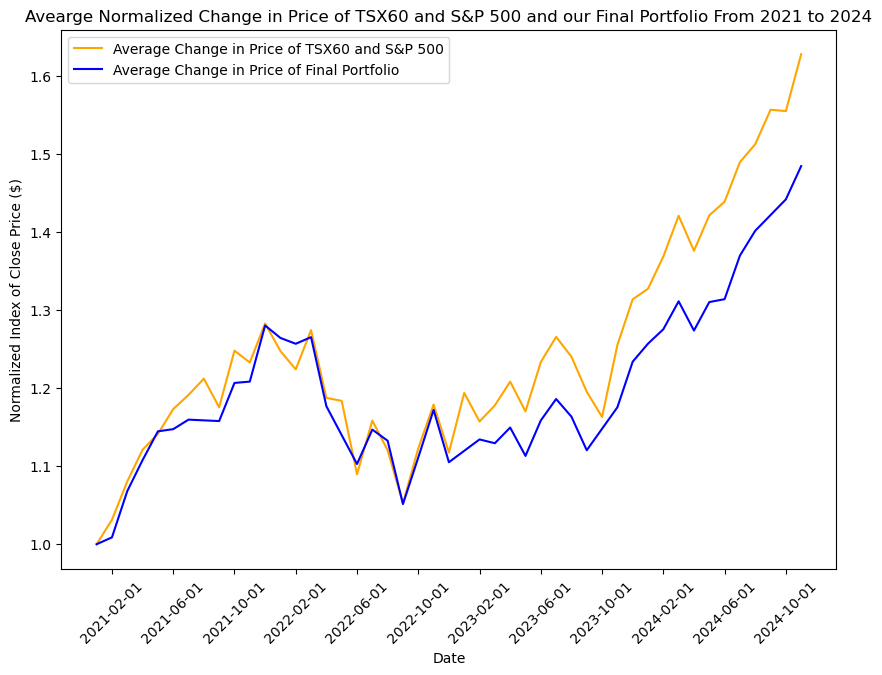

In [93]:
# Plotting the S&P 500 and TSX 60 Returns alongside the percent change
plt.figure(figsize=(10,7))

# Normalizing each close by the first close price to see the changes in prices, disregarding the intial value of either stock
avg_market_closeprice = ((sp500['Close']/sp500.iloc[0,0]) + (tsx.Close/tsx.Close.iloc[0]))/2
plt.plot(avg_market_closeprice, color = 'orange',  label="Average Change in Price of TSX60 and S&P 500")
plt.plot(stock_returns_df.Value/stock_returns_df.Value.iloc[0], color = 'blue',  label="Average Change in Price of Final Portfolio")

plt.xticks( ["2021-02-01", "2021-06-01", "2021-10-01", "2022-02-01", "2022-06-01", "2022-10-01", 
             "2023-02-01", "2023-06-01", "2023-10-01", "2024-02-01", "2024-06-01", "2024-10-01"], rotation = 45)

plt.title('Avearge Normalized Change in Price of TSX60 and S&P 500 and our Final Portfolio From 2021 to 2024')
plt.ylabel('Normalized Index of Close Price ($)')
plt.xlabel('Date')
plt.legend(loc='best')

This graph visualizes the normalized changes in the price of the TSX 60, the S&P 500 indexes, and our final portfolio from 2021 to 2024, showing how their values evolved over the three-year period. The orange line represents the average change in price for the TSX 60 and the S&P 500 combined, while the blue line reflects the performance of our constructed portfolio, which uses today's money to simulate the portfolio value if we had invested in the same amount of shares three years ago.

In [95]:
# corrleation  = np.corrcoef((stock_returns_df.Value/stock_returns_df.Value.iloc[0]), avg_market_closeprice)
# print("The correlation between our portfolio returns and the returns of S&P/TSX is ", corrleation[0,1])

## Final Remarks  
The correlation coeffiecent looks at the average of residuals between the two lines above. The closer these two lines are, the more likely the movement of the portfolio in this case, would be effected by the movement of the indexes. That is to say that a high correlation means that our portfolio tracks the average of the S&P and TSX 60 not only closely but accurately as it falls in lock step with the trend of the indexes. 

In [97]:
print("Portfolio_Final:")
print(Portfolio_Final)

Portfolio_Final:
   Ticker    Price Currency   Shares     Value    Weight
1    GC=F  3788.44      CAD    14.96  56691.35  5.669136
2    CSCO    81.85      CAD   666.67  54568.91  5.456958
3     PEP   226.48      CAD   217.50  49257.54  4.925776
4      SO   122.46      CAD   376.39  46094.61  4.609499
5   RY.TO   174.71      CAD   262.22  45812.19  4.581245
6   TD.TO    78.51      CAD   579.75  45516.31  4.551689
7    T.TO    21.26      CAD  2043.56  43446.11  4.344815
8    T.TO    21.26      CAD  2043.56  43446.11  4.344815
9      VZ    60.32      CAD   694.86  41916.30  4.191699
10    LOW   370.02      CAD   111.24  41160.91  4.116102
11   AAPL   321.36      CAD   124.60  40042.03  4.004216
12   ABBV   247.38      CAD   161.84  40036.46  4.003662
13    IBM   311.71      CAD   125.68  39175.69  3.917582
14   GOOG   232.86      CAD   166.10  38678.40  3.867857
15   COST  1347.69      CAD    28.37  38227.68  3.822771
16   COST  1347.69      CAD    28.37  38227.68  3.822771
17    CVS    8

In [98]:
export_csv(Portfolio_Final)

,Ticker,Shares
1,GC=F,14.96
2,CSCO,666.67
3,PEP,217.50
4,SO,376.39
5,RY.TO,262.22
6,TD.TO,579.75
7,T.TO,2043.56
8,T.TO,2043.56
9,VZ,694.86
10,LOW,111.24


## Contribution Declaration

The following team members made a meaningful contribution to this assignment:

Jack,
Jennifer,
Justus,
Precious 
